In [31]:
import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

In [11]:
train_data = pd.read_csv("quora-question-pairs/train.csv")

In [12]:
train_data.head(15)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [13]:
train_data.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [14]:
train_data.fillna('NO-Value',inplace = True)
train_data.isna().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [15]:

train_data['is_duplicate'].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

In [16]:
import seaborn as sns

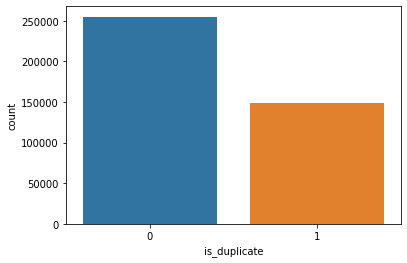

In [17]:
x = sns.countplot(x="is_duplicate", data=train_data)

In [18]:
print('~> Question pairs are not Similar (is_duplicate = 0):\n   {}%'.format(100 - round(train_data['is_duplicate'].mean()*100, 2)))
print('\n~> Question pairs are Similar (is_duplicate = 1):\n   {}%'.format(round(train_data['is_duplicate'].mean()*100, 2)))

~> Question pairs are not Similar (is_duplicate = 0):
   63.08%

~> Question pairs are Similar (is_duplicate = 1):
   36.92%


### No of unique questions

In [23]:
qids = pd.Series(train_data['qid1'].tolist() + train_data['qid2'].tolist())
unique_qs = len(np.unique(qids))
print((unique_qs))

537933


In [26]:
qs_morethan_onetime = np.sum(qids.value_counts() > 1)
print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))

Total number of  Unique Questions are: 537933



In [29]:
print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,
                                                                                      qs_morethan_onetime/unique_qs*100))
print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

q_vals=qids.value_counts()

q_vals=q_vals.values

Number of unique questions that appear more than one time: 111780 (20.77953945937505%)

Max number of times a single question is repeated: 157



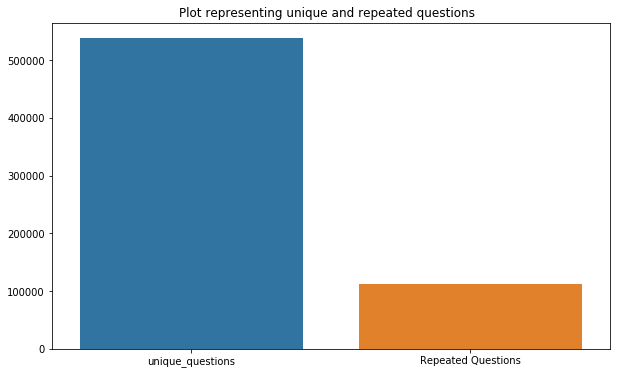

In [32]:

x = ["unique_questions" , "Repeated Questions"]
y =  [unique_qs , qs_morethan_onetime]

plt.figure(figsize=(10, 6))
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x,y)
plt.show()

In [39]:
# checking for duplicate questions

pair_duplicates = train_data[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()
pair_duplicates.head(20)

,qid1,qid2,is_duplicate
0,1,2,1
1,3,4,1
2,3,282170,1
3,3,380197,1
4,3,488853,1
5,4,32881,1
6,5,6,1
7,7,8,1
8,9,10,1
9,9,109465,1


In [41]:
print ("Number of duplicate questions",(pair_duplicates).shape[0] - train_data.shape[0])

Number of duplicate questions 0


In [45]:
#Checking whether there are any rows with null values
nan_rows = train_data[train_data.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


In [10]:
del train_data['id']
del train_data['qid1']
del train_data['qid2']


In [56]:
train_data.head(20)

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,How can I be a good geologist?,What should I do to be a great geologist?,1
8,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


## Preprocess our data 

In [57]:
train_data = train_data.applymap(lambda x : str(x).lower().strip() )

In [58]:
train_data.head(20)

,question1,question2,is_duplicate
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0
1,what is the story of kohinoor (koh-i-noor) dia...,what would happen if the indian government sto...,0
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0
3,why am i mentally very lonely? how can i solve...,find the remainder when [math]23^{24}[/math] i...,0
4,"which one dissolve in water quikly sugar, salt...",which fish would survive in salt water?,0
5,astrology: i am a capricorn sun cap moon and c...,"i'm a triple capricorn (sun, moon and ascendan...",1
6,should i buy tiago?,what keeps childern active and far from phone ...,0
7,how can i be a good geologist?,what should i do to be a great geologist?,1
8,when do you use シ instead of し?,"when do you use ""&"" instead of ""and""?",0
9,motorola (company): can i hack my charter moto...,how do i hack motorola dcx3400 for free internet?,0


In [59]:
train_data.columns

Index(['question1', 'question2', 'is_duplicate'], dtype='object')

In [60]:
import re
train_data = train_data.applymap(lambda x : re.sub(r"[^a-zA-Z0-9]+", " ",x))

In [61]:
train_data.iloc[3]['question2']

'find the remainder when math 23 24 math is divided by 24 23 '

In [63]:
copy_train_data = train_data

In [64]:
train_data.head(20)

,question1,question2,is_duplicate
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0
1,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0
3,why am i mentally very lonely how can i solve it,find the remainder when math 23 24 math is div...,0
4,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0
5,astrology i am a capricorn sun cap moon and ca...,i m a triple capricorn sun moon and ascendant ...,1
6,should i buy tiago,what keeps childern active and far from phone ...,0
7,how can i be a good geologist,what should i do to be a great geologist,1
8,when do you use instead of,when do you use instead of and,0
9,motorola company can i hack my charter motorol...,how do i hack motorola dcx3400 for free internet,0


In [65]:

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [24]:
from nltk.tokenize import word_tokenize
train_data['tokenize-q1'] = train_data['question1'].str.split(" ")
train_data['tokenize-q2'] = train_data['question2'].str.split(" ")

###  Remove Stopwords

In [25]:
train_data.head()

,question1,question2,is_duplicate,tokenize-q1,tokenize-q2
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,"[what, is, the, step, by, step, guide, to, inv...","[what, is, the, step, by, step, guide, to, inv..."
1,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0,"[what, is, the, story, of, kohinoor, koh, i, n...","[what, would, happen, if, the, indian, governm..."
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,"[how, can, i, increase, the, speed, of, my, in...","[how, can, internet, speed, be, increased, by,..."
3,why am i mentally very lonely how can i solve it,find the remainder when math 23 24 math is div...,0,"[why, am, i, mentally, very, lonely, how, can,...","[find, the, remainder, when, math, 23, 24, mat..."
4,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,"[which, one, dissolve, in, water, quikly, suga...","[which, fish, would, survive, in, salt, water, ]"


In [26]:
train_data['tokenize-q1'] = train_data['tokenize-q1'].apply(lambda x: " ".join([item for item in x if item not in stop_words]))
train_data['tokenize-q2'] = train_data['tokenize-q2'].apply(lambda x: " ".join([item for item in x if item not in stop_words]))

In [27]:
train_data.head(20)

,question1,question2,is_duplicate,tokenize-q1,tokenize-q2
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,step step guide invest share market india,step step guide invest share market
1,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0,story kohinoor koh noor diamond,would happen indian government stole kohinoor ...
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,increase speed internet connection using vpn,internet speed increased hacking dns
3,why am i mentally very lonely how can i solve it,find the remainder when math 23 24 math is div...,0,mentally lonely solve,find remainder math 23 24 math divided 24 23
4,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,one dissolve water quikly sugar salt methane c...,fish would survive salt water
5,astrology i am a capricorn sun cap moon and ca...,i m a triple capricorn sun moon and ascendant ...,1,astrology capricorn sun cap moon cap rising say,triple capricorn sun moon ascendant capricorn ...
6,should i buy tiago,what keeps childern active and far from phone ...,0,buy tiago,keeps childern active far phone video games
7,how can i be a good geologist,what should i do to be a great geologist,1,good geologist,great geologist
8,when do you use instead of,when do you use instead of and,0,use instead,use instead
9,motorola company can i hack my charter motorol...,how do i hack motorola dcx3400 for free internet,0,motorola company hack charter motorolla dcx3400,hack motorola dcx3400 free internet


In [28]:
from fuzzywuzzy import fuzz

C:\Users\20131073\AppData\Local\Continuum\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [29]:
# ! pip install fuzzywuzzy

In [30]:
a = "one coin?"
b = "this coin?"
Ratio = fuzz.token_set_ratio(a.lower(),b.lower())
print(Ratio)

67


In [135]:

df['col_3'] = df[['col_1','col_2']].apply(lambda x: f(*x), axis=1)

In [39]:
train_data.columns

Index(['question1', 'question2', 'is_duplicate', 'tokenize-q1', 'tokenize-q2',
       'fuzzy_set_ratio'],
      dtype='object')

In [1]:
#train_data["fuzzy_set_ratio"] = train_data.applymap(lambda x : (fuzz.token_set_ratio(train_data['tokenize-q1'],train_data['tokenize-q2'])))

In [53]:
# for i in range(0,50):
#     print(fuzz.ratio(copy_train_data.iloc[i]['question1'],copy_train_data.iloc[i]['question2']))